## Lid Driven Flow

Boundary conditions produce flow (everywhere)

**New concepts:** Meshes, Variables, Boundary conditions, Equation templates, Solvers, Plotting 

In [1]:
import underworld as uw
from underworld import function as fn
import glucifer
import numpy as np



In [2]:
res = 32
boxHeight = 1.0
aspect_ratio = 0.5

In [3]:
# A mesh to solve velocity and pressure

VPmesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q2/dPc1"), 
                                   elementRes  = (int(res * aspect_ratio), res), 
                                   minCoord    = (0., 0.), 
                                   maxCoord    = (boxHeight*aspect_ratio, boxHeight))

velocityField    = uw.mesh.MeshVariable( mesh=VPmesh,         nodeDofCount=2 )
pressureField    = uw.mesh.MeshVariable( mesh=VPmesh.subMesh, nodeDofCount=1 )

velocityField.data[:,:] = 0.0
pressureField.data[:] = 0.0


In [4]:
# Boundary conditions - specify:
# Vx on side walls (0) and Vx on top (1)
# Vy on top / bottom (0)

vxWalls = VPmesh.specialSets["MinI_VertexSet"] + \
          VPmesh.specialSets["MaxI_VertexSet"] + \
          VPmesh.specialSets["MaxJ_VertexSet"]

vyWalls = VPmesh.specialSets["MinJ_VertexSet"] + \
          VPmesh.specialSets["MaxJ_VertexSet"]

# We only need to specify the non-zero value of the driving terms because we zeroed everything previously

for index in VPmesh.specialSets["MaxJ_VertexSet"]:
    velocityField.data[index,0] = 1.0

    
# Now register that information

velocityBC = uw.conditions.DirichletCondition( variable = velocityField, 
                                               indexSetsPerDof = (vxWalls, vyWalls) )

    

In [5]:
# The equations are templated already 

stokesPIC = uw.systems.Stokes( velocityField  = velocityField, 
                               pressureField  = pressureField,
                               conditions     = [velocityBC,],
                               fn_viscosity   = 1.0, 
                               fn_bodyforce   = (0.0,0.0) )

# And a suitable solver package is already attached to it

solver = uw.systems.Solver( stokesPIC )

In [6]:
solver.solve()


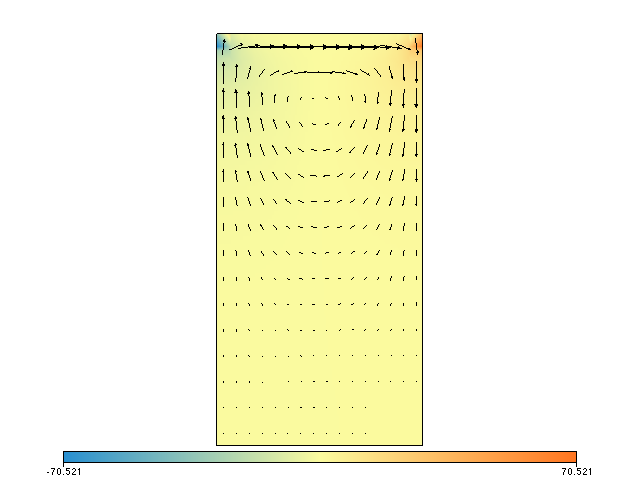

In [7]:
fig2 = glucifer.Figure()
fig2.append( glucifer.objects.VectorArrows( VPmesh, velocityField, arrowHead=0.2, scaling=0.1 ) )
fig2.append( glucifer.objects.Surface( VPmesh, pressureField ) )
fig2.show()

In [22]:
## Using the help. 

## the Drawing object is the parent class for Points, Mesh, VectorArrows

print ("Drawing Class Help: \n================= \n\n")
print (help(glucifer.objects.Drawing))

## 

print ("ColorMap Help: \n================= \n\n")
print (help(glucifer.objects.ColourMap))

print ("The names for default colourmaps are in glucifer.objects.colourMaps")
print (glucifer.lavavu.LavaVuPython.ColourMap_getDefaultMapNames())
print ("\n")


print ("VectorArrows Help: \n================= \n\n")
print (help(glucifer.objects.VectorArrows))


print ("Points Help: \n================= \n\n")
print (help(glucifer.objects.Points))

print ("Volume Help: \n================= \n\n")
print (help(glucifer.objects.Volume))




Drawing Class Help: 


Help on class Drawing in module glucifer.objects:

class Drawing(underworld._stgermain.StgCompoundComponent)
 |  This is the base class for all drawing objects but can also be instantiated 
 |  as is for direct/custom drawing.
 |  
 |  Note that the defaults here are often overridden by the child objects.
 |  
 |  Parameters
 |  ----------
 |  colours: str, list.
 |      See ColourMap class docstring for further information
 |  colourMap: glucifer.objects.ColourMap
 |      A ColourMap object for the object to use.
 |      This should not be specified if 'colours' is specified.
 |  opacity: float
 |      Opacity of object. If provided, must take values from 0. to 1.
 |  colourBar: bool
 |      Bool to determine if a colour bar should be rendered.
 |  valueRange: tuple, list
 |      See ColourMap class docstring for further information
 |  logScale: bool
 |      See ColourMap class docstring for further information
 |  discrete: bool
 |      See ColourMap class doc